# Project of the Course :

# "Medicine Manufacturing Analytics and Waste Revenue Estimator”

## Importing Dependices :-

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn 

In [2]:
from warnings import simplefilter
simplefilter(action='ignore')

In [3]:
df = pd.read_csv(r"A:\Study-Store\Internship\Python-ML\Project\dataset\medical data collection.csv")
df.head()

,batch_id,medicine_name,quantity_produced,production_date,expiry_date,unit_cost,units_sold,sale_date,waste_type,units_wasted,reason
0,1c74730c-ec9b-4d1e-98f5-db6bada528d4,Mrs. Joy Kling-Mertz,4758,2024-04-22T07:32:52.594Z,2025-01-17T18:46:29.825Z,692.806261,7888,2024-04-26T12:06:56.395Z,Rebecca Ullrich DDS,387,Beatrice Runolfsson
1,513f50ab-3492-412d-a2e4-e14924f3ed5f,Lois Schaefer,696,2024-12-29T00:33:57.469Z,2024-09-27T09:09:38.974Z,326.933393,2787,2024-06-01T00:54:46.853Z,Denise Gerlach,1205,Bobbie Tillman
2,f400d675-04cd-42b1-af19-8233c108979a,Benny Kertzmann,5493,2025-04-08T13:05:16.522Z,2024-04-21T09:24:01.038Z,391.738784,7293,2024-12-28T17:42:42.158Z,Traci Mosciski,951,Kelley Johnston
3,9966bd9e-c271-44c3-aa3c-eb49daf0369b,Kelley Hansen,8503,2025-03-11T15:40:07.199Z,2024-10-04T00:59:42.438Z,891.374725,5322,2025-01-26T02:44:08.671Z,Jane Ondricka,2114,Maria Hackett
4,62830741-d1f4-45f3-943f-f5976fe4e0ce,Ruby Romaguera,2356,2024-08-09T13:47:56.565Z,2024-12-18T16:49:00.341Z,372.635888,8418,2024-10-21T15:58:41.075Z,Dr. Lynn Corwin,2435,Sarah Goodwin


## Data Inspection :-

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6732 entries, 0 to 6731
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   batch_id           6732 non-null   object 
 1   medicine_name      6732 non-null   object 
 2   quantity_produced  6732 non-null   int64  
 3   production_date    6732 non-null   object 
 4   expiry_date        6732 non-null   object 
 5   unit_cost          6732 non-null   float64
 6   units_sold         6732 non-null   int64  
 7   sale_date          6732 non-null   object 
 8   waste_type         6732 non-null   object 
 9   units_wasted       6732 non-null   int64  
 10  reason             6732 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 578.7+ KB


In [5]:
df.describe()

,quantity_produced,unit_cost,units_sold,units_wasted
count,6732.000000,6732.000000,6732.000000,6732.000000
mean,4992.646910,502.150524,5055.847148,4976.003565
std,2868.419331,289.973988,2888.641046,2891.944269
min,2.000000,0.043264,4.000000,5.000000
25%,2483.750000,255.766938,2552.000000,2429.000000
50%,4953.500000,499.389392,5086.000000,5017.500000
75%,7462.000000,754.022354,7550.250000,7493.750000
max,9999.000000,999.866868,9999.000000,10000.000000


In [6]:
df.size

74052

In [7]:
df.isnull().sum()

batch_id             0
medicine_name        0
quantity_produced    0
production_date      0
expiry_date          0
unit_cost            0
units_sold           0
sale_date            0
waste_type           0
units_wasted         0
reason               0
dtype: int64

## Converting Data :-

In [8]:
df.head(3)

,batch_id,medicine_name,quantity_produced,production_date,expiry_date,unit_cost,units_sold,sale_date,waste_type,units_wasted,reason
0,1c74730c-ec9b-4d1e-98f5-db6bada528d4,Mrs. Joy Kling-Mertz,4758,2024-04-22T07:32:52.594Z,2025-01-17T18:46:29.825Z,692.806261,7888,2024-04-26T12:06:56.395Z,Rebecca Ullrich DDS,387,Beatrice Runolfsson
1,513f50ab-3492-412d-a2e4-e14924f3ed5f,Lois Schaefer,696,2024-12-29T00:33:57.469Z,2024-09-27T09:09:38.974Z,326.933393,2787,2024-06-01T00:54:46.853Z,Denise Gerlach,1205,Bobbie Tillman
2,f400d675-04cd-42b1-af19-8233c108979a,Benny Kertzmann,5493,2025-04-08T13:05:16.522Z,2024-04-21T09:24:01.038Z,391.738784,7293,2024-12-28T17:42:42.158Z,Traci Mosciski,951,Kelley Johnston


In [9]:
df['production_date']=pd.to_datetime(df['production_date'],errors='coerce').dt.tz_localize(None)

In [10]:
invalid_dates = df[df['production_date'].isna() | df['expiry_date'].isna()]
print(f"Found {len(invalid_dates)} rows with invalid dates.")

Found 0 rows with invalid dates.


In [11]:
df['expiry_date']=pd.to_datetime(df['expiry_date'],errors='coerce').dt.tz_localize(None)

In [12]:
df['sale_date']=pd.to_datetime(df['sale_date'],errors='coerce').dt.tz_localize(None)

In [13]:
print(df[['production_date', 'expiry_date']].dtypes)

production_date    datetime64[ns]
expiry_date        datetime64[ns]
dtype: object


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6732 entries, 0 to 6731
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   batch_id           6732 non-null   object        
 1   medicine_name      6732 non-null   object        
 2   quantity_produced  6732 non-null   int64         
 3   production_date    6732 non-null   datetime64[ns]
 4   expiry_date        6732 non-null   datetime64[ns]
 5   unit_cost          6732 non-null   float64       
 6   units_sold         6732 non-null   int64         
 7   sale_date          6732 non-null   datetime64[ns]
 8   waste_type         6732 non-null   object        
 9   units_wasted       6732 non-null   int64         
 10  reason             6732 non-null   object        
dtypes: datetime64[ns](3), float64(1), int64(3), object(4)
memory usage: 578.7+ KB


In [15]:
df.head()

,batch_id,medicine_name,quantity_produced,production_date,expiry_date,unit_cost,units_sold,sale_date,waste_type,units_wasted,reason
0,1c74730c-ec9b-4d1e-98f5-db6bada528d4,Mrs. Joy Kling-Mertz,4758,2024-04-22 07:32:52.594,2025-01-17 18:46:29.825,692.806261,7888,2024-04-26 12:06:56.395,Rebecca Ullrich DDS,387,Beatrice Runolfsson
1,513f50ab-3492-412d-a2e4-e14924f3ed5f,Lois Schaefer,696,2024-12-29 00:33:57.469,2024-09-27 09:09:38.974,326.933393,2787,2024-06-01 00:54:46.853,Denise Gerlach,1205,Bobbie Tillman
2,f400d675-04cd-42b1-af19-8233c108979a,Benny Kertzmann,5493,2025-04-08 13:05:16.522,2024-04-21 09:24:01.038,391.738784,7293,2024-12-28 17:42:42.158,Traci Mosciski,951,Kelley Johnston
3,9966bd9e-c271-44c3-aa3c-eb49daf0369b,Kelley Hansen,8503,2025-03-11 15:40:07.199,2024-10-04 00:59:42.438,891.374725,5322,2025-01-26 02:44:08.671,Jane Ondricka,2114,Maria Hackett
4,62830741-d1f4-45f3-943f-f5976fe4e0ce,Ruby Romaguera,2356,2024-08-09 13:47:56.565,2024-12-18 16:49:00.341,372.635888,8418,2024-10-21 15:58:41.075,Dr. Lynn Corwin,2435,Sarah Goodwin


## Data Processing :-

In [16]:
valid_waste_types = ['Expired', 'Packaging Waste', 'Damaged Goods', 'Chemical Residue']
df['waste_type'] = np.random.choice(valid_waste_types, size=len(df))
print(df['waste_type'].value_counts())

waste_type
Packaging Waste     1734
Expired             1706
Chemical Residue    1659
Damaged Goods       1633
Name: count, dtype: int64


In [17]:
valid_reasons = ['Expired','Damaged in Transit','storage Failure','Contamination']
df['reason'] = np.random.choice(valid_reasons,size=len(df))
print(df['reason'].value_counts())

reason
storage Failure       1745
Damaged in Transit    1679
Contamination         1661
Expired               1647
Name: count, dtype: int64


In [18]:
df['unsold_units'] = df['quantity_produced'] - df['units_sold']
df['revenue'] = df['units_sold'] * df['unit_cost']
print(df[['unsold_units','revenue']].head())

   unsold_units       revenue
0         -3130  5.464856e+06
1         -2091  9.111634e+05
2         -1800  2.856951e+06
3          3181  4.743896e+06
4         -6062  3.136849e+06


In [19]:
df['shelf_life_days'] = (df['expiry_date'] - df['production_date']).dt.days
print(df[['shelf_life_days']].head())

   shelf_life_days
0              270
1              -93
2             -353
3             -159
4              131


In [20]:
df.head()

,batch_id,medicine_name,quantity_produced,production_date,expiry_date,unit_cost,units_sold,sale_date,waste_type,units_wasted,reason,unsold_units,revenue,shelf_life_days
0,1c74730c-ec9b-4d1e-98f5-db6bada528d4,Mrs. Joy Kling-Mertz,4758,2024-04-22 07:32:52.594,2025-01-17 18:46:29.825,692.806261,7888,2024-04-26 12:06:56.395,Packaging Waste,387,Expired,-3130,5.464856e+06,270
1,513f50ab-3492-412d-a2e4-e14924f3ed5f,Lois Schaefer,696,2024-12-29 00:33:57.469,2024-09-27 09:09:38.974,326.933393,2787,2024-06-01 00:54:46.853,Damaged Goods,1205,Contamination,-2091,9.111634e+05,-93
2,f400d675-04cd-42b1-af19-8233c108979a,Benny Kertzmann,5493,2025-04-08 13:05:16.522,2024-04-21 09:24:01.038,391.738784,7293,2024-12-28 17:42:42.158,Expired,951,Damaged in Transit,-1800,2.856951e+06,-353
3,9966bd9e-c271-44c3-aa3c-eb49daf0369b,Kelley Hansen,8503,2025-03-11 15:40:07.199,2024-10-04 00:59:42.438,891.374725,5322,2025-01-26 02:44:08.671,Chemical Residue,2114,Expired,3181,4.743896e+06,-159
4,62830741-d1f4-45f3-943f-f5976fe4e0ce,Ruby Romaguera,2356,2024-08-09 13:47:56.565,2024-12-18 16:49:00.341,372.635888,8418,2024-10-21 15:58:41.075,Packaging Waste,2435,Damaged in Transit,-6062,3.136849e+06,131


## EDA (Exploratary Data Analysis) :-

In [105]:
sn.set(style="whitegrid")

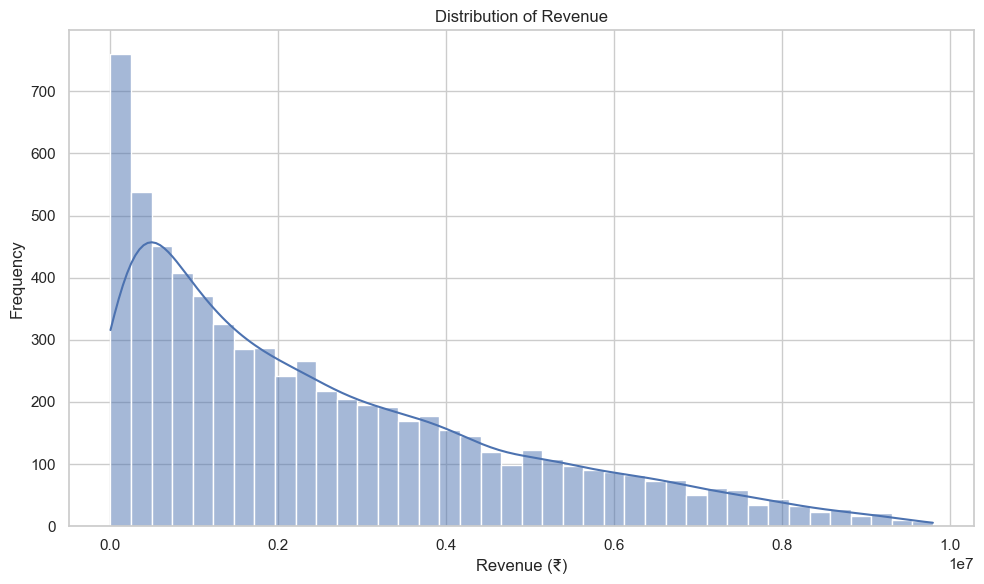

In [108]:
# 1. Distribution of Revenue
plt.figure(figsize=(10, 6))
sn.histplot(df['revenue'], bins=40, kde=True)
plt.title("Distribution of Revenue")
plt.xlabel("Revenue (₹)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


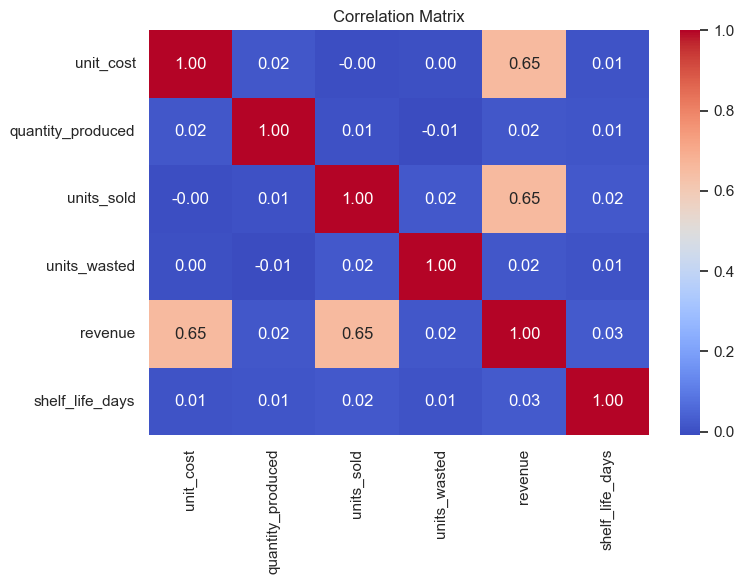

In [110]:
# 2. Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = df[['unit_cost', 'quantity_produced', 'units_sold', 'units_wasted', 'revenue', 'shelf_life_days']].corr()
sn.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

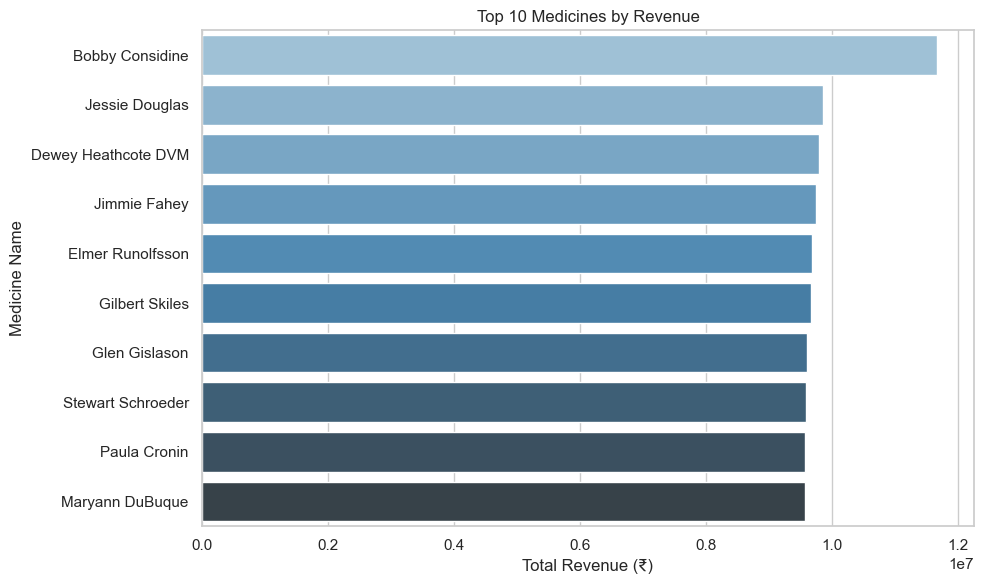

In [112]:
#3. Revenue by Medicine (Top 10)
top_meds = df.groupby('medicine_name')['revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sn.barplot(x=top_meds.values, y=top_meds.index, palette='Blues_d')
plt.title("Top 10 Medicines by Revenue")
plt.xlabel("Total Revenue (₹)")
plt.ylabel("Medicine Name")
plt.tight_layout()
plt.show()

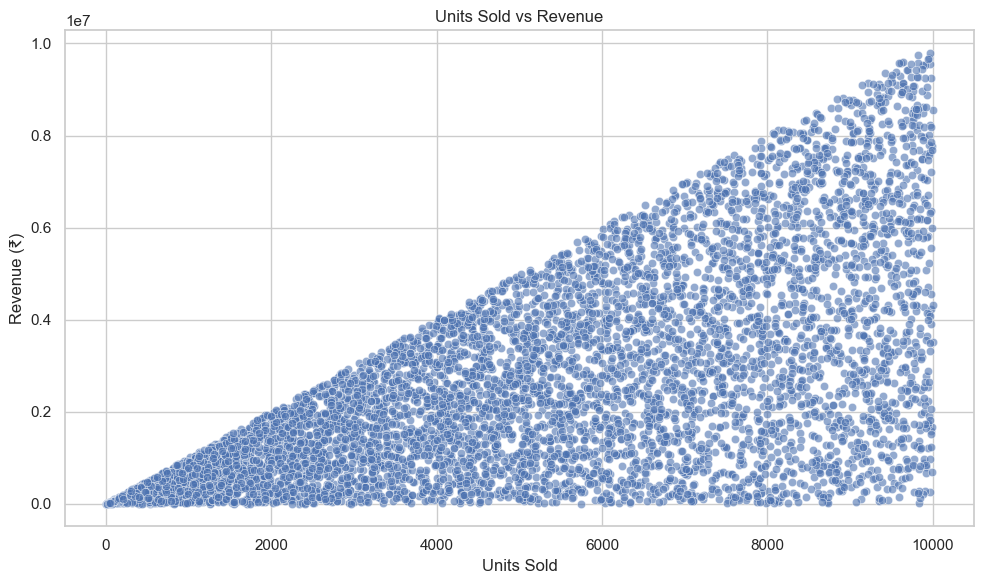

In [114]:
# 4. Scatter: Units Sold vs Revenue
plt.figure(figsize=(10, 6))
sn.scatterplot(data=df, x='units_sold', y='revenue', alpha=0.6)
plt.title("Units Sold vs Revenue")
plt.xlabel("Units Sold")
plt.ylabel("Revenue (₹)")
plt.grid(True)
plt.tight_layout()
plt.show()

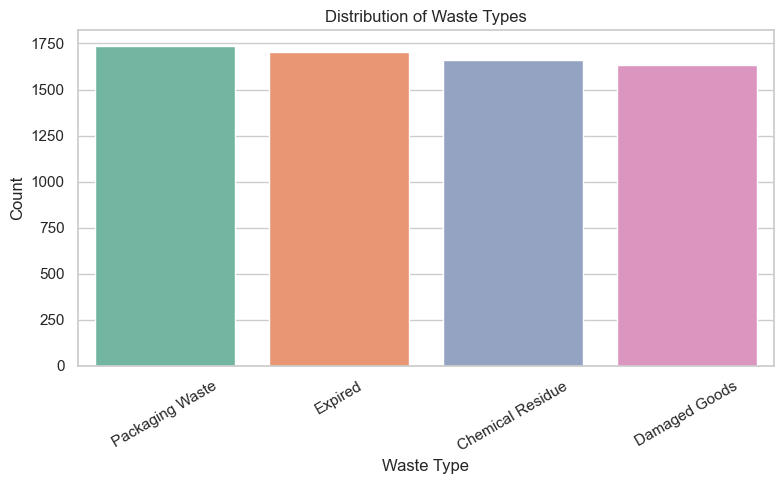

In [117]:
# 5. Waste Type Distribution
plt.figure(figsize=(8, 5))
sn.countplot(data=df, x='waste_type', order=df['waste_type'].value_counts().index, palette='Set2')
plt.title("Distribution of Waste Types")
plt.xlabel("Waste Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## Feature Enginnering:-

In [21]:
df['percent_sold'] = df['units_sold'] / df['quantity_produced']
df['units_remaining'] = df['quantity_produced'] - (df['units_sold'] + df['units_wasted'])

In [22]:
df.head(3)

,batch_id,medicine_name,quantity_produced,production_date,expiry_date,unit_cost,units_sold,sale_date,waste_type,units_wasted,reason,unsold_units,revenue,shelf_life_days,percent_sold,units_remaining
0,1c74730c-ec9b-4d1e-98f5-db6bada528d4,Mrs. Joy Kling-Mertz,4758,2024-04-22 07:32:52.594,2025-01-17 18:46:29.825,692.806261,7888,2024-04-26 12:06:56.395,Packaging Waste,387,Expired,-3130,5.464856e+06,270,1.657839,-3517
1,513f50ab-3492-412d-a2e4-e14924f3ed5f,Lois Schaefer,696,2024-12-29 00:33:57.469,2024-09-27 09:09:38.974,326.933393,2787,2024-06-01 00:54:46.853,Damaged Goods,1205,Contamination,-2091,9.111634e+05,-93,4.004310,-3296
2,f400d675-04cd-42b1-af19-8233c108979a,Benny Kertzmann,5493,2025-04-08 13:05:16.522,2024-04-21 09:24:01.038,391.738784,7293,2024-12-28 17:42:42.158,Expired,951,Damaged in Transit,-1800,2.856951e+06,-353,1.327690,-2751


## Train Test Split :-

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
features = ['unit_cost', 'quantity_produced', 'shelf_life_days', 'percent_sold', 'units_remaining']
target = 'units_wasted'

In [25]:
df_model = df[features +[target]].dropna()

In [26]:
x = df_model[features]
y = df_model[target]

In [27]:
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [28]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((5385, 5), (1347, 5), (5385,), (1347,))

## Random Forest Regressor :-

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
lr_model = RandomForestRegressor(random_state=42)

In [31]:
lr_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

## Model Training & Evaluation :-

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
y_pred = rf_model.predict(x_test)

In [35]:
y_pred

array([2484.54, 2793.51, 9095.98, ..., 1922.22, 7947.96, 6360.47],
      shape=(1347,))

In [36]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

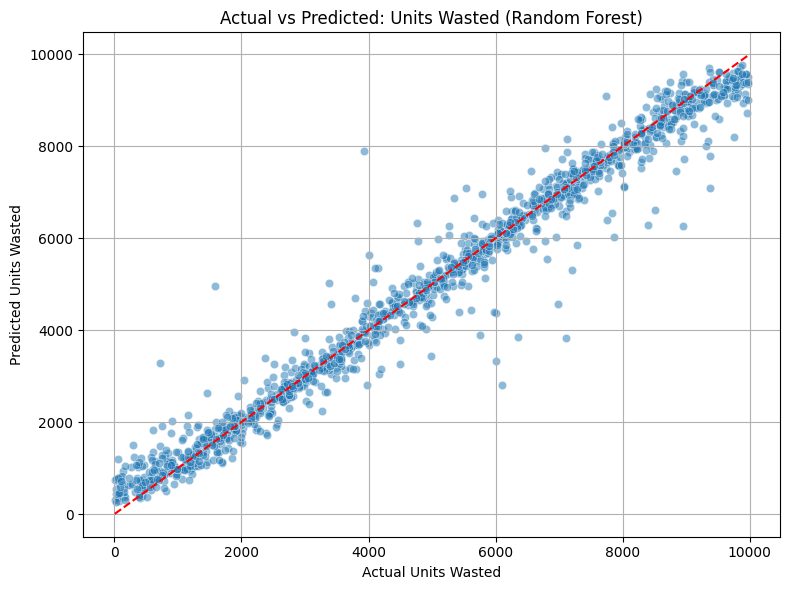

In [37]:
plt.figure(figsize=(8, 6))
sn.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Units Wasted")
plt.ylabel("Predicted Units Wasted")
plt.title("Actual vs Predicted: Units Wasted (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
print("📊 Random Forest Evaluation Metrics:")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

📊 Random Forest Evaluation Metrics:
RMSE (Root Mean Squared Error): 468.72
MAE (Mean Absolute Error): 284.94
R² Score: 0.97


In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [41]:
rf = RandomForestRegressor(random_state=42)

In [42]:
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=param_grid,
                               n_iter=10,
                               cv=5,
                               verbose=1,
                               n_jobs=-1,
                               random_state=42)

In [47]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, verbose=1)

In [51]:
print("Training Complete!")
print("Best parameters found: ", rf_random.best_params_)
print("Best score found: ", rf_random.best_score_)

Training Complete!
Best parameters found:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Best score found:  0.969391546375558


In [52]:
best_rf = rf_random.best_estimator_
y_pred_best = best_rf.predict(x_test)

## Prediction Test :-

In [77]:
new_data = pd.read_csv(r"A:\Study-Store\Internship\Python-ML\Project\dataset\Predict_dataset.csv")
new_data.head(2)

,batch_id,medicine_name,quantity_produced,production_date,expiry_date,unit_cost,units_sold,sale_date,waste_type,units_wasted,reason
0,1c74730c-ec9b-4d1e-98f5-db6bada528d4,Mrs. Joy Kling-Mertz,4758,2024-04-22T07:32:52.594Z,2025-01-17T18:46:29.825Z,692.806261,7888,2024-04-26T12:06:56.395Z,Rebecca Ullrich DDS,387,Beatrice Runolfsson
1,513f50ab-3492-412d-a2e4-e14924f3ed5f,Lois Schaefer,696,2024-12-29T00:33:57.469Z,2024-09-27T09:09:38.974Z,326.933393,2787,2024-06-01T00:54:46.853Z,Denise Gerlach,1205,Bobbie Tillman


In [66]:
new_data['production_date'] = pd.to_datetime(new_data['production_date'], errors='coerce')
new_data['expiry_date'] = pd.to_datetime(new_data['expiry_date'], errors='coerce')
new_data['shelf_life_days'] = (new_data['expiry_date'] - new_data['production_date']).dt.days
new_data['percent_sold'] = new_data['units_sold'] / new_data['quantity_produced']
new_data['units_remaining'] = new_data['quantity_produced'] - (new_data['units_sold'] + new_data['units_wasted'])

In [78]:
df.head()

,batch_id,medicine_name,quantity_produced,production_date,expiry_date,unit_cost,units_sold,sale_date,waste_type,units_wasted,reason,unsold_units,revenue,shelf_life_days,percent_sold,units_remaining
0,1c74730c-ec9b-4d1e-98f5-db6bada528d4,Mrs. Joy Kling-Mertz,4758,2024-04-22 07:32:52.594,2025-01-17 18:46:29.825,692.806261,7888,2024-04-26 12:06:56.395,Packaging Waste,387,Expired,-3130,5.464856e+06,270,1.657839,-3517
1,513f50ab-3492-412d-a2e4-e14924f3ed5f,Lois Schaefer,696,2024-12-29 00:33:57.469,2024-09-27 09:09:38.974,326.933393,2787,2024-06-01 00:54:46.853,Damaged Goods,1205,Contamination,-2091,9.111634e+05,-93,4.004310,-3296
2,f400d675-04cd-42b1-af19-8233c108979a,Benny Kertzmann,5493,2025-04-08 13:05:16.522,2024-04-21 09:24:01.038,391.738784,7293,2024-12-28 17:42:42.158,Expired,951,Damaged in Transit,-1800,2.856951e+06,-353,1.327690,-2751
3,9966bd9e-c271-44c3-aa3c-eb49daf0369b,Kelley Hansen,8503,2025-03-11 15:40:07.199,2024-10-04 00:59:42.438,891.374725,5322,2025-01-26 02:44:08.671,Chemical Residue,2114,Expired,3181,4.743896e+06,-159,0.625897,1067
4,62830741-d1f4-45f3-943f-f5976fe4e0ce,Ruby Romaguera,2356,2024-08-09 13:47:56.565,2024-12-18 16:49:00.341,372.635888,8418,2024-10-21 15:58:41.075,Packaging Waste,2435,Damaged in Transit,-6062,3.136849e+06,131,3.573005,-8497


In [67]:
x_new = new_data[features].dropna()

In [68]:
predicted_waste = best_rf.predict(x_new)

In [71]:
print("\n Predicted Units Wasted: ")
predicted_waste


 Predicted Units Wasted: 


array([ 540.70766667, 1273.9647381 ,  929.28290873, ..., 6371.78425   ,
       2282.64856349, 6337.48666667], shape=(6732,))

In [72]:
y_pred_test = best_rf.predict(x_test)

In [73]:
comparison_df = pd.DataFrame({
    'Actual Units Wasted': y_test.values,
    'Predicted Units Wasted': y_pred_test
})

In [74]:
comparison_df

,Actual Units Wasted,Predicted Units Wasted
0,2391,2440.552421
1,2831,2774.330940
2,8584,9048.050726
3,1143,1937.219202
4,3892,4187.450881
...,...,...
1342,5898,5826.277405
1343,1336,1315.982690
1344,1815,1889.193976
1345,8231,7983.912107


In [97]:
df['revenue_amount'] = df['revenue'].apply(lambda x: f"₹{x:,.2f}")

In [98]:
print(df[['revenue_amount']].head())

  revenue_amount
0  ₹5,464,855.79
1    ₹911,163.37
2  ₹2,856,950.95
3  ₹4,743,896.29
4  ₹3,136,848.90


## Predication EDA :-

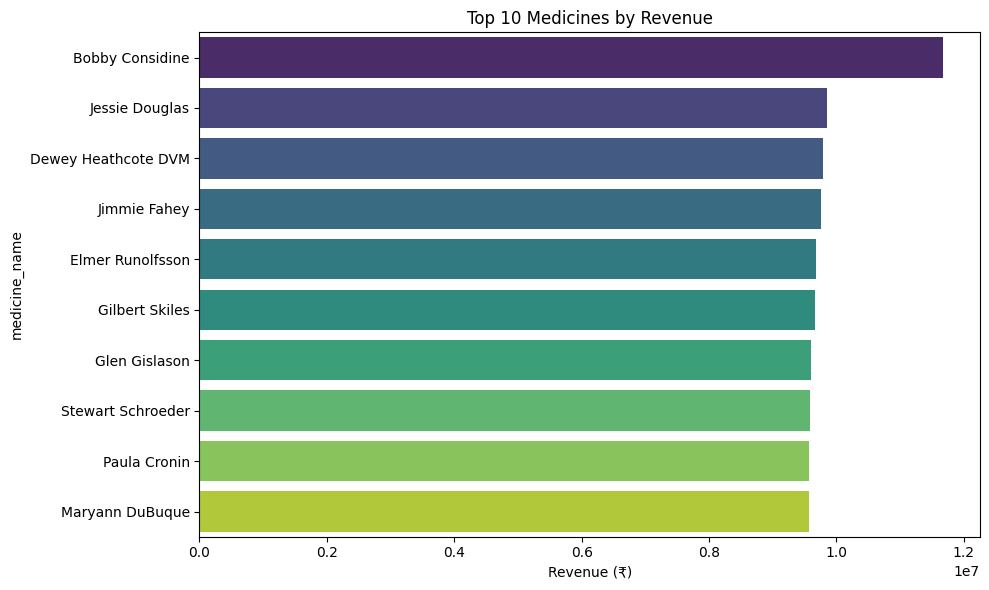

In [100]:
top_revenue = df.groupby('medicine_name')['revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sn.barplot(x=top_revenue.values, y=top_revenue.index, palette='viridis')
plt.xlabel("Revenue (₹)")
plt.title("Top 10 Medicines by Revenue")
plt.tight_layout()
plt.show()

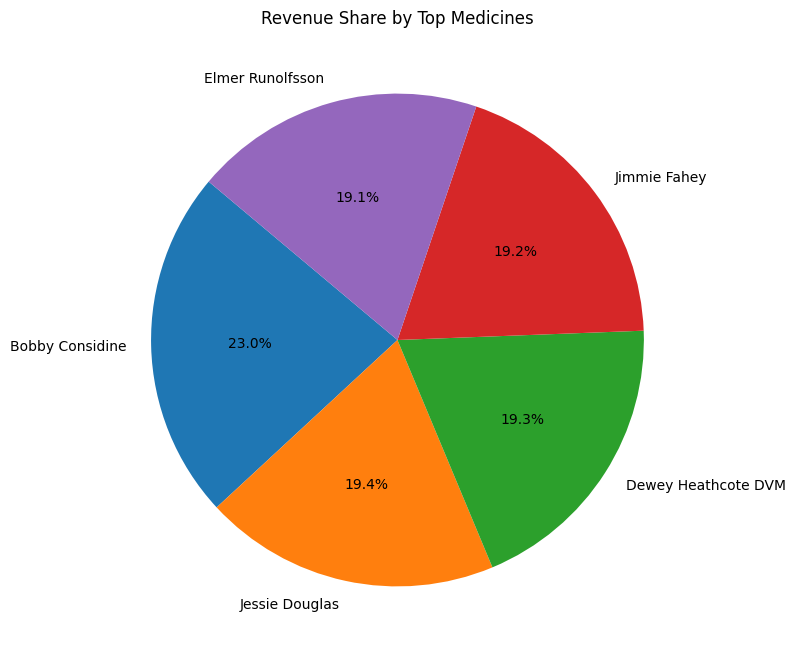

In [101]:
revenue_share = df.groupby('medicine_name')['revenue'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8,8))
plt.pie(revenue_share, labels=revenue_share.index, autopct='%1.1f%%', startangle=140)
plt.title("Revenue Share by Top Medicines")
plt.show()

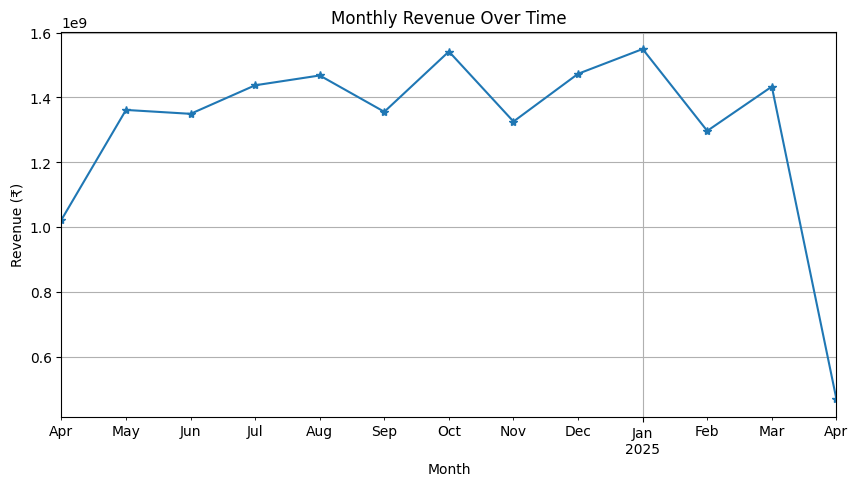

In [103]:
df['sale_month'] = df['sale_date'].dt.to_period('M')
monthly_revenue = df.groupby('sale_month')['revenue'].sum()

plt.figure(figsize=(10,5))
monthly_revenue.plot(marker='*')
plt.title("Monthly Revenue Over Time")
plt.xlabel("Month")
plt.ylabel("Revenue (₹)")
plt.grid(True)
plt.show()

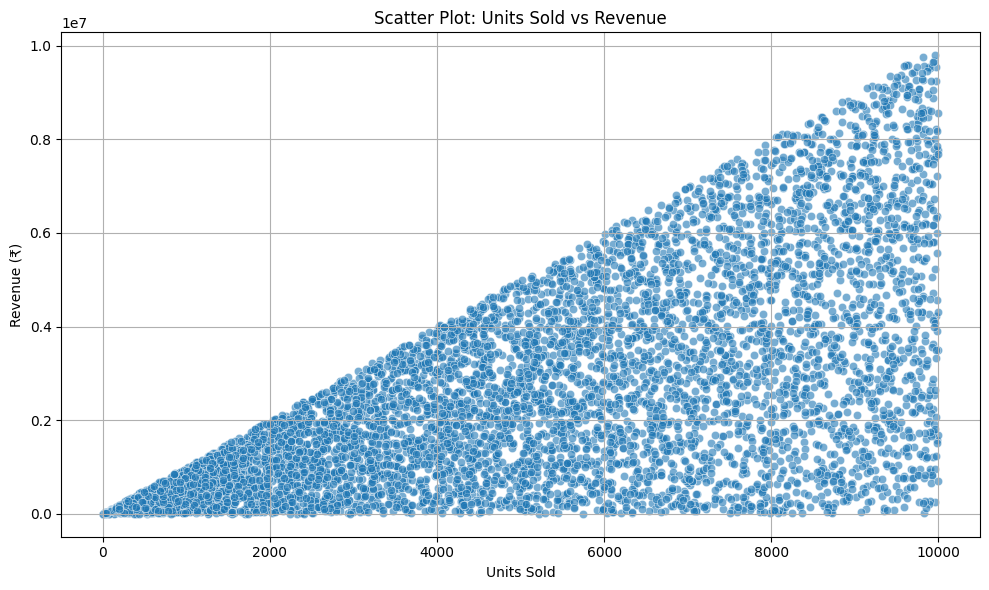

In [104]:
plt.figure(figsize=(10, 6))
sn.scatterplot(data=df, x='units_sold', y='revenue', alpha=0.6)
plt.xlabel("Units Sold")
plt.ylabel("Revenue (₹)")
plt.title("Scatter Plot: Units Sold vs Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()